# How to arrange your plot in Magics

The position of a page is set with the 4 following parameters

- **page_x_position / page_y_position** : to position in cm the bottom left corner of the page in its parent
- **page_x_length / page_y_length** : the dimension in cm.

The drawing area ( where the plotting is rendered) is called subpage and can position into the page using the 4 following parameters

- **subpage_x_position / subpage_y_position** : to position in cm the bottom left corner of the drawing area (subpage)  in its parent page.
- **subpage_x_length / subpage_y_length** : the dimension in cm.

Magics plot has several basic elements:  

page,  
subpages,  
background,  
(data, contours)xN,  
foreground,  
legend,  
text  

This notebook will concentrate on page and subpage.  
- Page holds all the other elements.  
- Subpage contains the map.

First we define all the other elements.

In [1]:
import Magics.macro as magics

In [2]:
light_background = magics.mcoast(
    map_coastline_sea_shade_colour  = 'white',
    map_coastline_land_shade_colour = 'cream',
    map_grid                        = 'off',
    map_coastline_land_shade        = 'on',
    map_coastline_sea_shade         = 'off',
    map_label                       = 'off',
    map_coastline_colour            = 'tan')

foreground = magics.mcoast()

legend = magics.mlegend(legend_display_type       = 'continuous',
                        legend_automatic_position = 'right')

tp = magics.mgrib(grib_input_file_name = "data/total_precipitation.grib")

ecmwf_cont = magics.mcont(
    contour_automatic_setting = "ecmwf",
    legend                    = "on")

tp_legend = magics.mlegend (    
    legend_display_type       = "continuous",
    legend_automatic_position = "right",
    legend_title              = "on",
    legend_title_text         = "Total precipitation",
    legend_text_font_size     = "0.45",
    legend_text_colour        = "#2b619e",
    legend_label_frequency    = 1) 

### mmap = subpage/projection
Subpage is the smallest entity - they contain one map.  
A geographical projection is also defined in the subpage.  

First we set projection parameters. We can choose the projection and projection parameters. If we don't set position and size parameters Magics will fit our map on the page. 

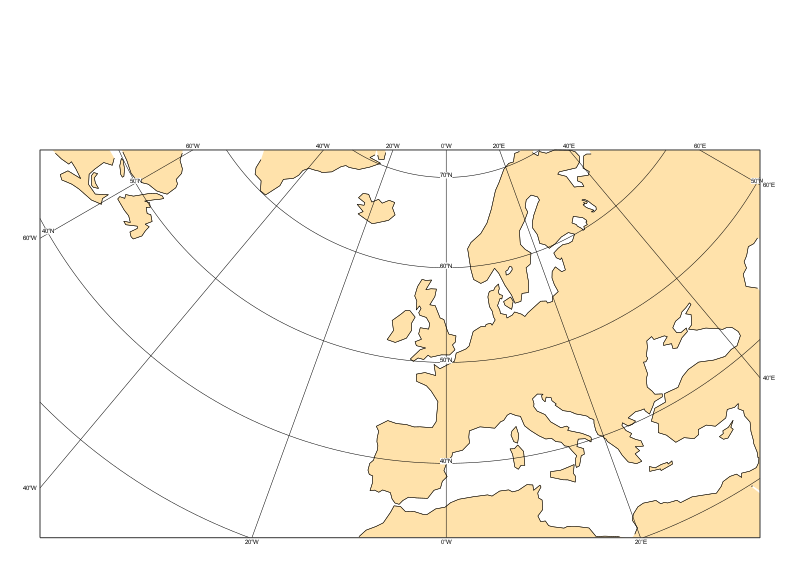

In [3]:
projection = magics.mmap(
                  subpage_lower_left_latitude   = 21.51,
                  subpage_lower_left_longitude  = -37.27,
                  subpage_upper_right_latitude  = 51.28, 
                  subpage_upper_right_longitude = 65., 
                  subpage_map_projection        = "polar_stereographic",
                  page_id_line                  = "off")

magics.plot(projection, light_background, foreground)

But we can control that too.  
- subpage_y_position - Y-Coordinate of lower left hand corner of subpage in cm
- subpage_x_position - X-Coordinate of lower left hand corner of subpage in cm
- subpage_x_length   - Length of subpage in horizontal direction in cm
- subpage_y_length   - Length of subpage in vertical direction in cm

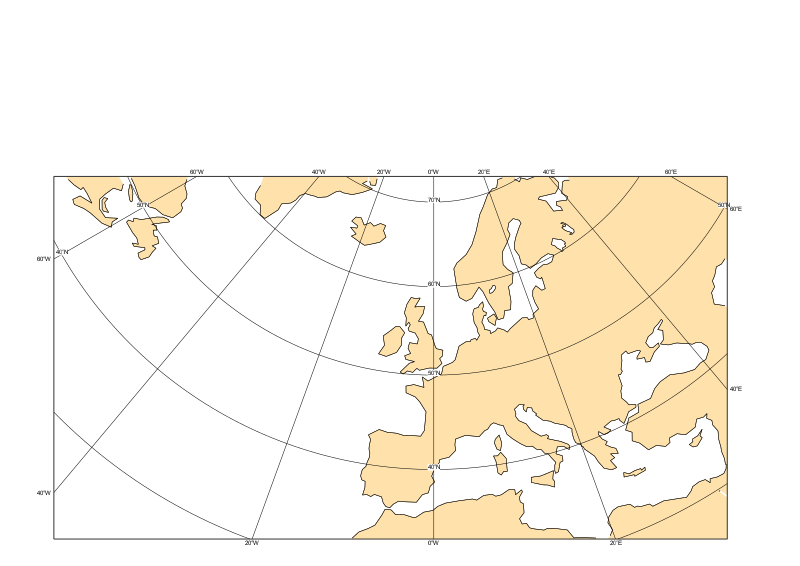

In [8]:
projection = magics.mmap(
                  #subpage_background_colour     = 'sky',
                  #subpage_frame                 = 'off',
                  subpage_lower_left_latitude   = 21.51,
                  subpage_lower_left_longitude  = -37.27,
                  subpage_upper_right_latitude  = 51.28, 
                  subpage_upper_right_longitude = 65., 
                  subpage_x_position            = 2,
                  subpage_y_position            = 1,
                  subpage_x_length              = 25,
                  subpage_y_length              = 18,
                  subpage_map_projection        = "polar_stereographic",
                  page_id_line                  = "off")

magics.plot(projection, light_background, foreground)

### Page  
Default page size is A4. Default plot_direction is vertical.  
Layout can be positional, in which case we can control page width and lenght.

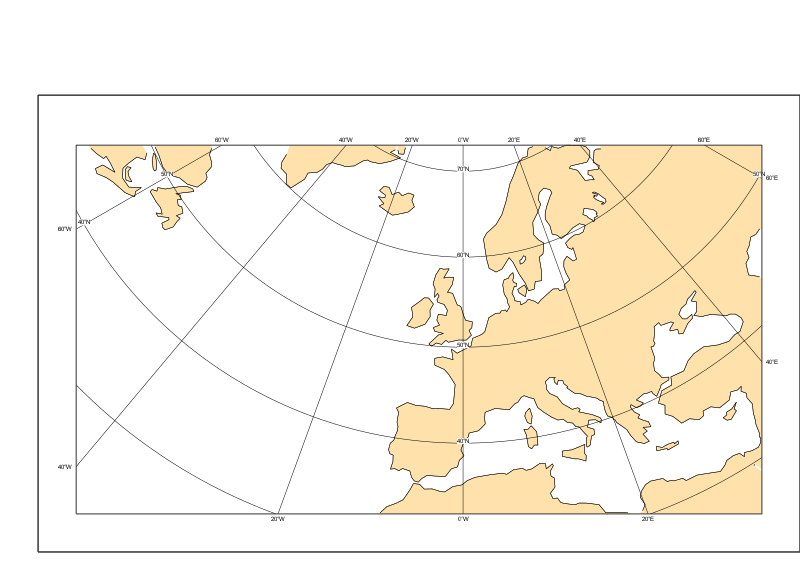

In [5]:
projection = magics.mmap(
   #subpage_background_colour     = 'sky',
   #subpage_frame                 = 'off',
    subpage_lower_left_latitude   = 21.51,
    subpage_lower_left_longitude  = -37.27,
    subpage_upper_right_latitude  = 51.28, 
    subpage_upper_right_longitude = 65., 
    subpage_x_position            = 1,
    subpage_y_position            = 1,
    subpage_x_length              = 18,
    subpage_y_length              = 12,
    subpage_map_projection        = "polar_stereographic",
    page_id_line                  = "off")


magics_page = magics.page( 
    page_frame         = 'on',
    layout             = 'positional',
    page_x_length      = 20.,
    page_y_length      = 12.,
    page_id_line       = 'off',
    page_x_position    = 1,
    page_y_position    = 0.5,
    super_page_x_length = 21.00,
    super_page_y_length = 15.00
        )

#png = magics.output(
#    output_formats                = ['png'],
#    output_name_first_page_number = "off",
#    output_name                   = "my_png",
#    output_width                  = 1000,
#    output_cairo_transparent_background = 'on')
#magics.plot(png, magics_page, projection, light_background, foreground)

magics.plot(magics_page, projection, light_background, foreground)

If we make subpage, page and superpage the same size we will get the map on 100% of the page.

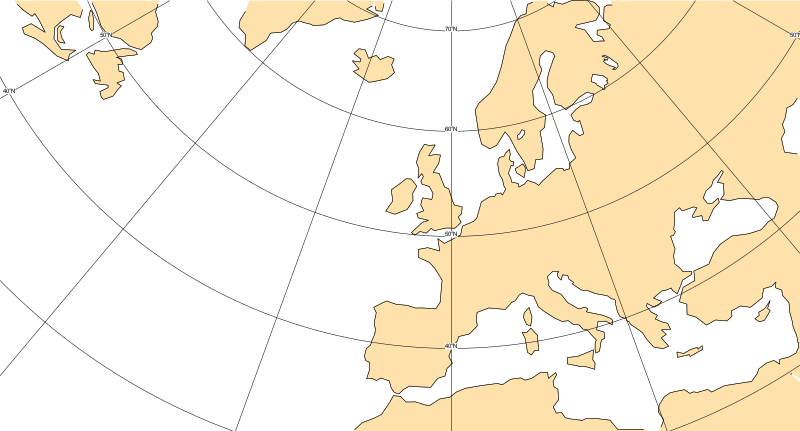

In [6]:
projection = magics.mmap(
   #subpage_background_colour     = 'sky',
   subpage_frame                 = 'off',
    subpage_lower_left_latitude   = 21.51,
    subpage_lower_left_longitude  = -37.27,
    subpage_upper_right_latitude  = 51.28, 
    subpage_upper_right_longitude = 65., 
    subpage_x_position            = 0,
    subpage_y_position            = 0,
    subpage_x_length              = 18,
    subpage_y_length              =  9.70,
    subpage_map_projection        = "polar_stereographic",
    page_id_line                  = "off")


magics_page = magics.page( 
    page_frame         = 'off',
    layout             = 'positional',
    page_x_length      = 18.,
    page_y_length      =  9.70,
    page_id_line       = 'off',
    page_x_position    = 0,
    page_y_position    = 0,
    super_page_x_length = 18.00,
    super_page_y_length = 9.70
        )

magics.plot(magics_page, projection, light_background, foreground)

And now we can add our data!

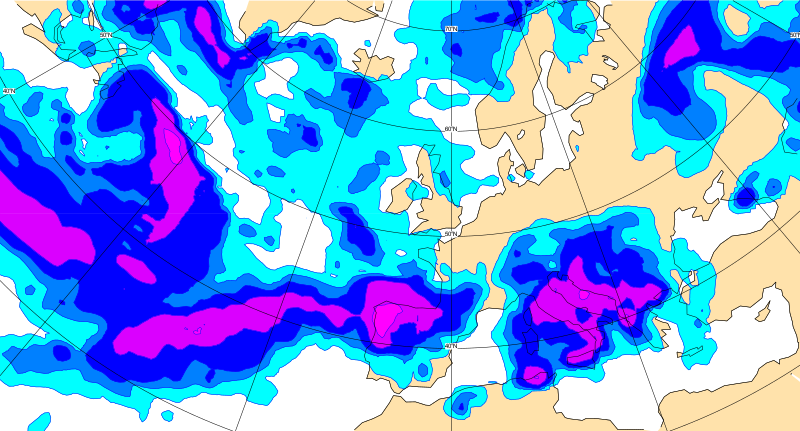

In [7]:
magics.plot(magics_page, projection, light_background, tp, ecmwf_cont, foreground)